[*********************100%***********************]  16 of 16 completed


Average quarterly returns during stagflation:
Ticker
NG=F    0.117424
XLE     0.068567
CL=F    0.060769
GC=F    0.026428
XLU     0.010181
XLP     0.008742
HG=F    0.004205
XLV    -0.009218
XLK    -0.019103
XLI    -0.019906
XLB    -0.020866
SI=F   -0.025187
XLC    -0.038363
XLY    -0.039883
XLF    -0.040294
XLRE   -0.042562
dtype: float64

Average quarterly returns otherwise:
Ticker
XLC     0.058410
SI=F    0.038640
XLK     0.036475
XLY     0.036456
XLI     0.031912
XLRE    0.030738
XLB     0.029708
HG=F    0.029703
GC=F    0.029284
XLF     0.028213
CL=F    0.025464
XLV     0.025271
XLE     0.023714
XLU     0.022644
XLP     0.018851
NG=F    0.015757
dtype: float64


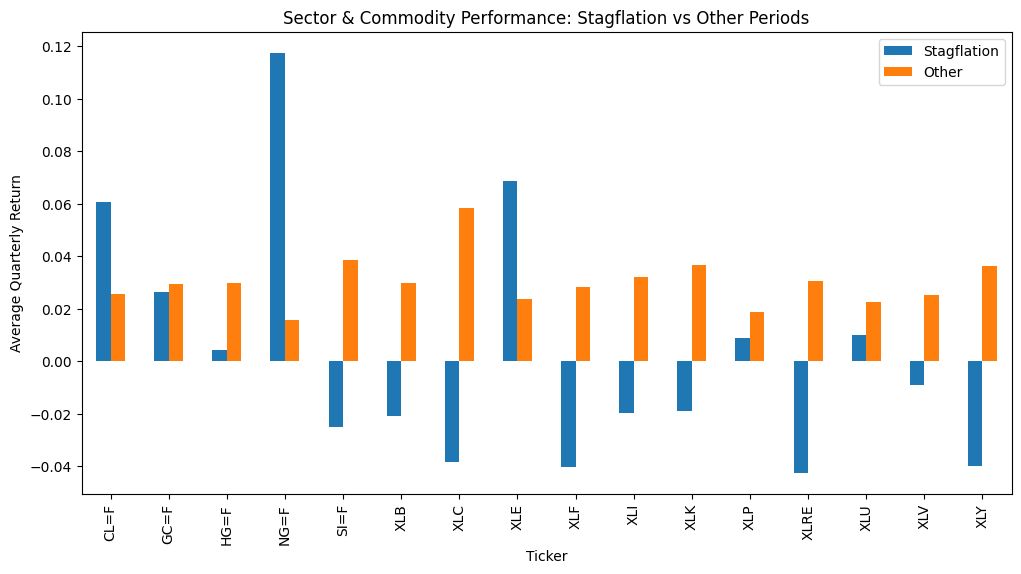

In [ ]:
# --- Imports ---
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import datetime

# --- Step 1: Data Retrieval ---
tickers = ["GC=F", "SI=F", "CL=F", "NG=F", "HG=F", 
           "XLE", "XLB", "XLF", "XLI", "XLK", "XLP", 
           "XLRE", "XLU", "XLV", "XLY", "XLC"]

# ETF data generally only exists after ~1990s
prices = yf.download(tickers, start="1970-01-01", auto_adjust=True)["Close"]

# --- Step 2: Macro Data from FRED ---
start = datetime.datetime(1970, 1, 1)
cpi = pdr.DataReader("CPIAUCSL", "fred", start)
gdp = pdr.DataReader("GDPC1", "fred", start)

# --- Step 3: Resample CPI & GDP to Quarterly ---
cpi_q = cpi.resample("QE").last()
gdp_q = gdp.resample("QE").last()

# Compute inflation YoY and GDP growth at quarterly frequency
cpi_q["inflation_yoy"] = cpi_q["CPIAUCSL"].pct_change(4) * 100
gdp_q["gdp_growth"] = gdp_q["GDPC1"].pct_change() * 100

# --- Step 4: Define Stagflation (Quarterly Boolean Series) ---
stagflation = (cpi_q["inflation_yoy"] > 4) & (gdp_q["gdp_growth"] < 1)

# --- Step 5: Resample Asset Prices to Quarterly Returns ---
returns = prices.resample("QE").last().pct_change()

# Align stagflation index to returns index
stagflation = stagflation.reindex(returns.index, method="ffill")

# --- Step 6: Slice Returns into Stagflation vs Non-Stagflation ---
stag_returns = returns[stagflation]
non_stag_returns = returns[~stagflation]

# --- Step 7: Compare Average Performance ---
print("Average quarterly returns during stagflation:")
print(stag_returns.mean().sort_values(ascending=False))

print("\nAverage quarterly returns otherwise:")
print(non_stag_returns.mean().sort_values(ascending=False))

# --- Step 8: Visualization ---
df_compare = pd.DataFrame({
    "Stagflation": stag_returns.mean(),
    "Other": non_stag_returns.mean()
})

df_compare.plot(kind="bar", figsize=(12,6), title="Sector & Commodity Performance: Stagflation vs Other Periods")
plt.ylabel("Average Quarterly Return")
plt.show()
